# Credit Card Fraud Classification with various ML Models

In [2]:
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv('creditcard.csv')

In [4]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
dataset[dataset['Class'] == 1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [7]:
zeros = 284315
ones = 492

In [8]:
ones / len(dataset) * 100

0.1727485630620034

# Data Visualisation

In [9]:
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline

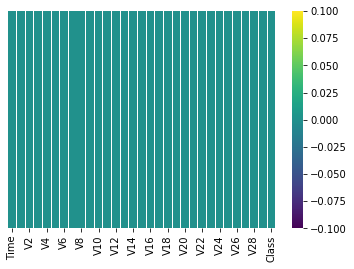

In [10]:
# To check if there is a null value in the data
sns.heatmap(dataset.isnull(), yticklabels=False, cmap='viridis')

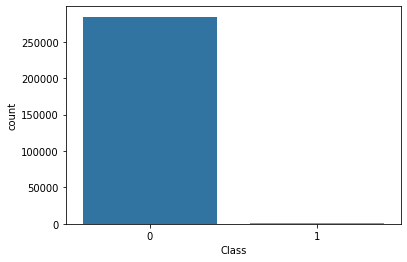

In [11]:
# to see the count of class
sns.countplot(x='Class', data=dataset)

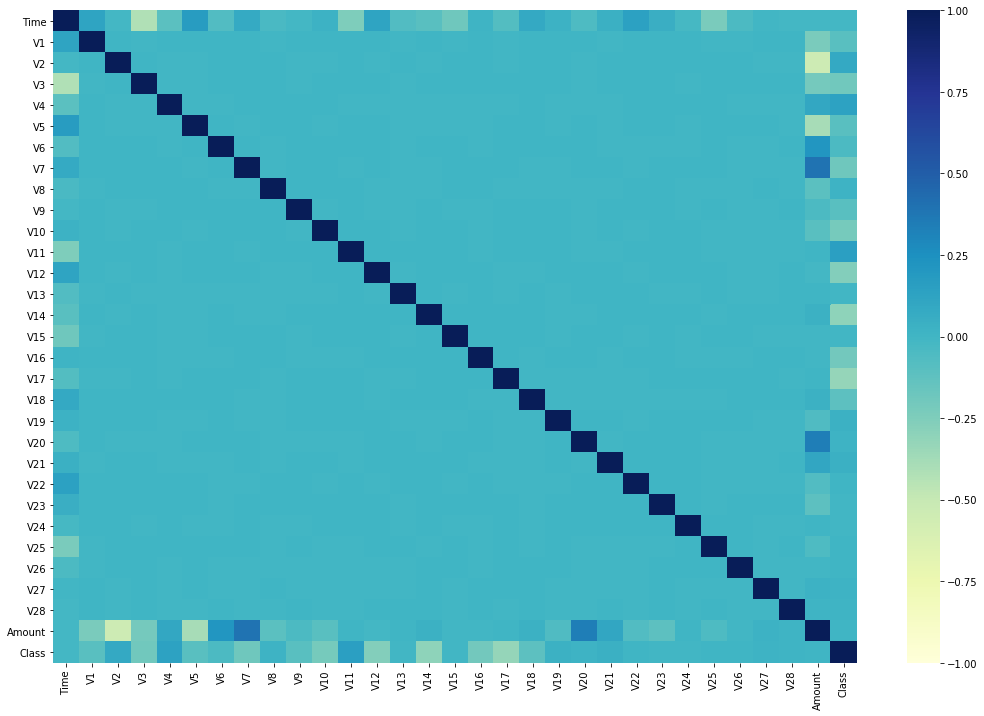

In [12]:
plt.figure(figsize=(18, 12))
sns.heatmap(dataset.corr(), vmin=-1, cmap='YlGnBu')
plt.show()

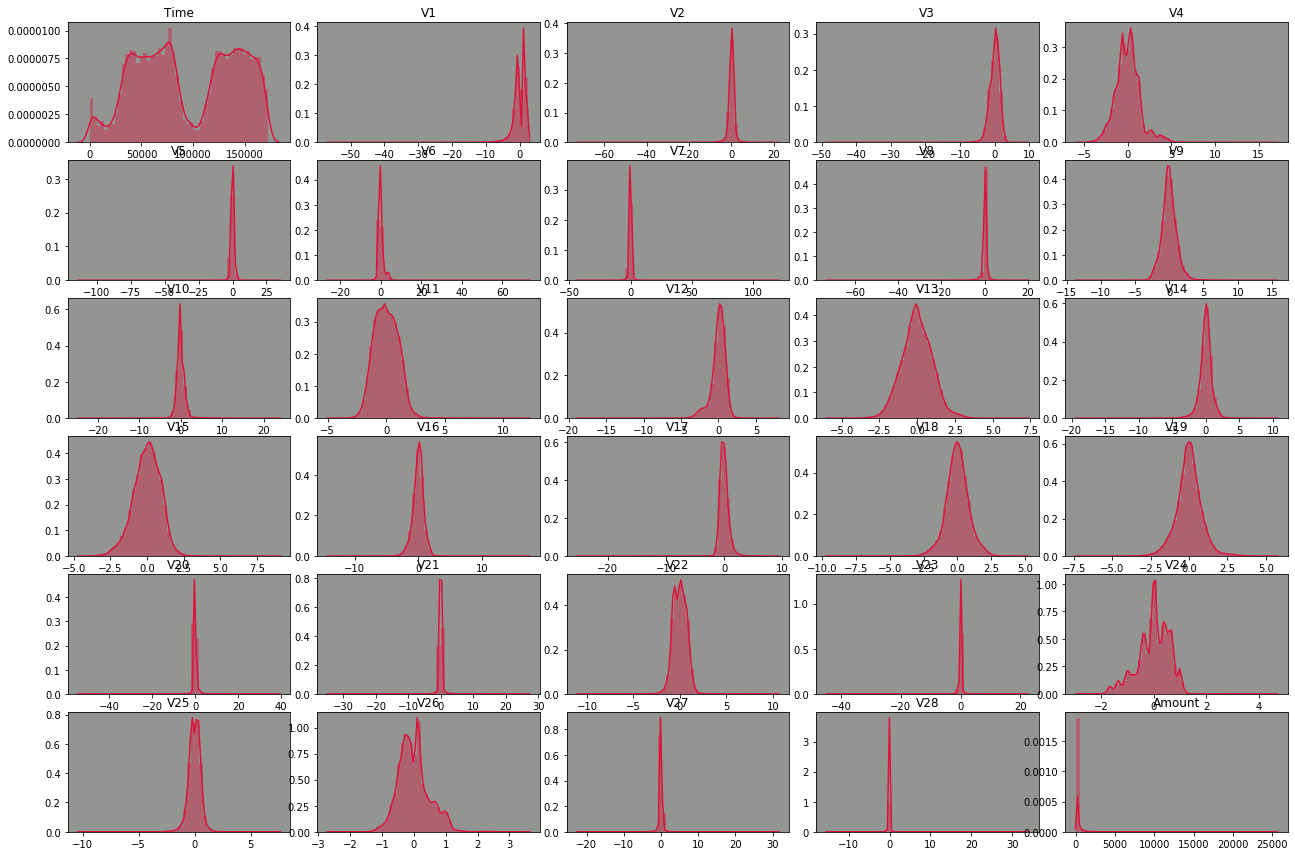

In [13]:
fig, axs = plt.subplots(6, 5, squeeze=False, figsize=(18,12))
#plt.subplot(figsize=(28, 28))

for i, ax in enumerate(axs.flatten()):
    ax.set_facecolor('xkcd:grey')
    ax.set_title(dataset.columns[i])
    sns.distplot(dataset.iloc[:, i], ax=ax,
                 color="#DC143C", fit_kws={"color": "#4e8ef5"})
    ax.set_xlabel('')
fig.tight_layout(h_pad=-1.5, w_pad=-1.5)
plt.show()

## Dataset Train test split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)

## Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss, matthews_corrcoef

In [25]:
logistic_regressor = LogisticRegression(max_iter=1500, class_weight={1: 2.2}, verbose=3, random_state=10, solver='lbfgs') #class weight gives better results

In [26]:
logistic_regressor.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s finished


LogisticRegression(C=1.0, class_weight={1: 2.2}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=3,
                   warm_start=False)

### Results

### Train data

In [27]:
predictions_train = logistic_regressor.predict(X_train)

In [28]:
print(confusion_matrix(y_train, predictions_train))
print('\n')
print(classification_report(y_train, predictions_train))
print('\n')
print(accuracy_score(y_train, predictions_train))
print(log_loss(y_train, predictions_train))

[[227306    141]
 [   107    291]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227447
           1       0.67      0.73      0.70       398

    accuracy                           1.00    227845
   macro avg       0.84      0.87      0.85    227845
weighted avg       1.00      1.00      1.00    227845



0.9989115407404157
0.037594545806033636


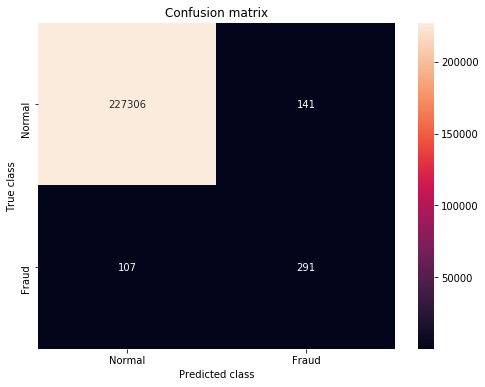

In [29]:
#printing the confusion matrix
LABELS = ['Normal' , 'Fraud']
conf_matrix = confusion_matrix(y_train, predictions_train)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS,
 yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### Test data

In [33]:
predictions_test = logistic_regressor.predict(X_test)

In [34]:
print(confusion_matrix(y_test, predictions_test).ravel()) # tn, fp, fn, tp

[56827    41    25    69]


In [35]:
print(confusion_matrix(y_test, predictions_test))
print('\n')
print(classification_report(y_test, predictions_test))
print('\n')
print(accuracy_score(y_test, predictions_test))
print(log_loss(y_test, predictions_test))

[[56827    41]
 [   25    69]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.63      0.73      0.68        94

    accuracy                           1.00     56962
   macro avg       0.81      0.87      0.84     56962
weighted avg       1.00      1.00      1.00     56962



0.9988413328183702
0.04001952223515326


In [36]:
# # Reshape the prediction values to 0 for valid, 1 for fraud. 
# predictions[predictions == 1] = 0
# predictions[predictions == -1] = 1

# n_errors = (predictions != y_test).sum()

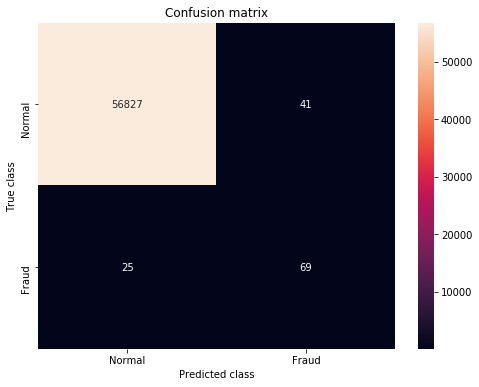

In [37]:
#printing the confusion matrix
LABELS = ['Normal' , 'Fraud']
conf_matrix = confusion_matrix(y_test, predictions_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS,
 yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# SVM

In [94]:
from sklearn.svm import SVC

In [95]:
model = SVC(gamma=0.5, kernel='linear', random_state=10)

In [96]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='linear',
    max_iter=-1, probability=False, random_state=10, shrinking=True, tol=0.001,
    verbose=False)

## Train

In [97]:
svm_predictions_train = model.predict(X_train)

In [98]:
print(confusion_matrix(y_train, svm_predictions_train))
print('\n')
print(classification_report(y_train, svm_predictions_train))
print('\n')
print(accuracy_score(y_train, svm_predictions_train))
print(log_loss(y_train, svm_predictions_train))

[[227394     53]
 [   258    140]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227447
           1       0.73      0.35      0.47       398

    accuracy                           1.00    227845
   macro avg       0.86      0.68      0.74    227845
weighted avg       1.00      1.00      1.00    227845



0.9986350369768922
0.04714433864022142


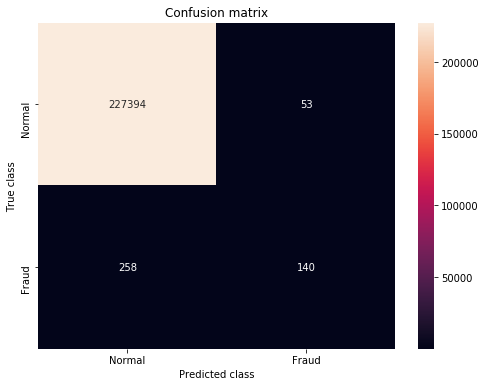

In [99]:
#printing the confusion matrix
LABELS = ['Normal' , 'Fraud']
conf_matrix = confusion_matrix(y_train, svm_predictions_train)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS,
 yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## Test

In [100]:
svm_predictions_test = model.predict(X_test)

In [102]:
print(confusion_matrix(y_test, svm_predictions_test))
print('\n')
print(classification_report(y_test, svm_predictions_test))
print('\n')
print(accuracy_score(y_test, svm_predictions_test))
print(log_loss(y_test, svm_predictions_test))

[[56854    14]
 [   55    39]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.74      0.41      0.53        94

    accuracy                           1.00     56962
   macro avg       0.87      0.71      0.77     56962
weighted avg       1.00      1.00      1.00     56962



0.9987886661282961
0.04183818625773175


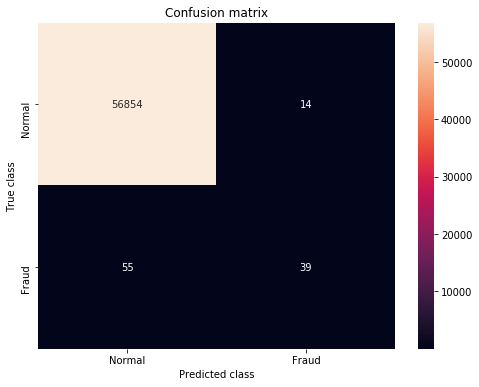

In [103]:
#printing the confusion matrix
LABELS = ['Normal' , 'Fraud']
conf_matrix = confusion_matrix(y_test, svm_predictions_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS,
 yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [53]:
decision_classifier = DecisionTreeClassifier(criterion='gini', random_state=10)

In [54]:
decision_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

## Train data predictions

In [55]:
predictions_dc_train = decision_classifier.predict(X_train)

In [56]:
print(confusion_matrix(y_train, predictions_dc_train))
print('\n')
print(classification_report(y_train, predictions_dc_train))
print('\n')
print(accuracy_score(y_train, predictions_dc_train))
print(log_loss(y_train, predictions_dc_train))

[[227447      0]
 [     0    398]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227447
           1       1.00      1.00      1.00       398

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



1.0
9.99200722162641e-16


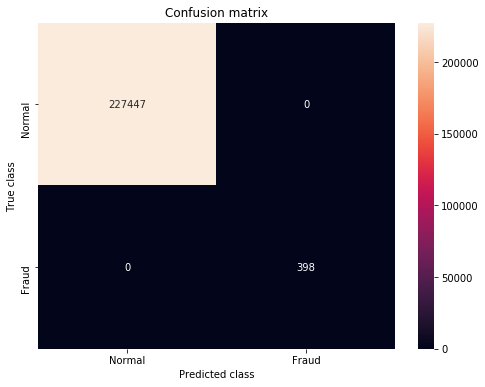

In [57]:
#printing the confusion matrix
LABELS = ['Normal' , 'Fraud']
conf_matrix = confusion_matrix(y_train, predictions_dc_train)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS,
 yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## Test data 

In [58]:
predictions_dc_test = decision_classifier.predict(X_test)

In [59]:
print(confusion_matrix(y_test, predictions_dc_test))
print('\n')
print(classification_report(y_test, predictions_dc_test))
print('\n')
print(accuracy_score(y_test, predictions_dc_test))
print(log_loss(y_test, predictions_dc_test))

[[56850    18]
 [   21    73]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.80      0.78      0.79        94

    accuracy                           1.00     56962
   macro avg       0.90      0.89      0.89     56962
weighted avg       1.00      1.00      1.00     56962



0.9993153330290369
0.02364781208797649


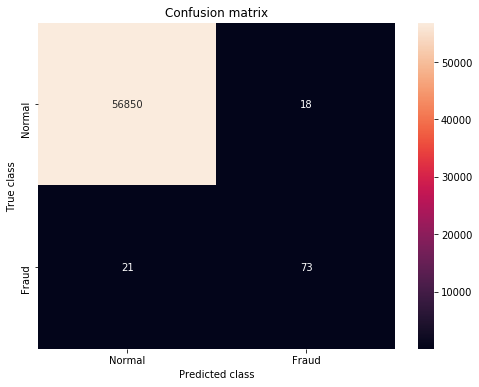

In [60]:
#printing the confusion matrix
LABELS = ['Normal' , 'Fraud']
conf_matrix = confusion_matrix(y_test, predictions_dc_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS,
 yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
forest_classifier = RandomForestClassifier(n_estimators=5, class_weight={1: 3.2}, random_state=10)

In [63]:
forest_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={1: 3.2},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

## Train data

In [64]:
predictions_rf_train = forest_classifier.predict(X_train)

In [65]:
print(confusion_matrix(y_train, predictions_rf_train))
print('\n')
print(classification_report(y_train, predictions_rf_train))
print('\n')
print(accuracy_score(y_train, predictions_rf_train))
print(log_loss(y_train, predictions_rf_train))

[[227444      3]
 [    22    376]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227447
           1       0.99      0.94      0.97       398

    accuracy                           1.00    227845
   macro avg       1.00      0.97      0.98    227845
weighted avg       1.00      1.00      1.00    227845



0.999890276284316
0.0037897334094023796


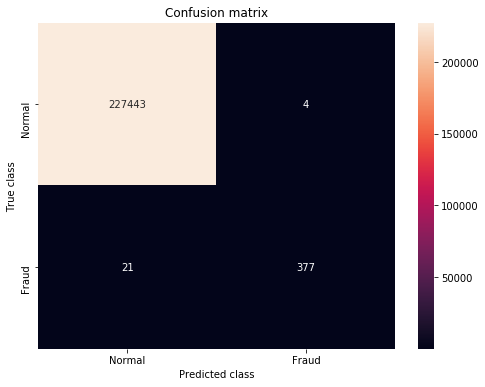

In [358]:
#printing the confusion matrix
LABELS = ['Normal' , 'Fraud']
conf_matrix = confusion_matrix(y_train, predictions_rf_train)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS,
 yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## test data

In [66]:
predictions_rf_test = forest_classifier.predict(X_test)

In [67]:
print(confusion_matrix(y_test, predictions_rf_test))
print('\n')
print(classification_report(y_test, predictions_rf_test))
print('\n')
print(accuracy_score(y_test, predictions_rf_test))
print(log_loss(y_test, predictions_rf_test))
print('\n')
print(matthews_corrcoef(y_test, predictions_rf_test))
print('\n')
print(confusion_matrix(y_test, predictions_rf_test).ravel()) # tn, fp , fn, tp

[[56864     4]
 [   18    76]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.95      0.81      0.87        94

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



0.9996137776061234
0.013339705050346066


0.8762205535305218


[56864     4    18    76]


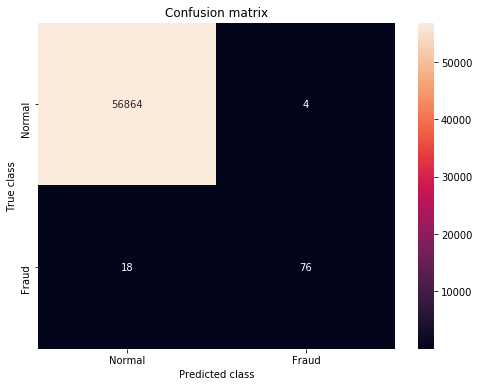

In [68]:
#printing the confusion matrix
LABELS = ['Normal' , 'Fraud']
conf_matrix = confusion_matrix(y_test, predictions_rf_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS,
 yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### Random forest worked better without data normalisation or i can say immune to imbalanced data

# XGboost

In [69]:
from xgboost import XGBClassifier, XGBRFClassifier

In [70]:
xgbc = XGBClassifier(random_state=10, gamma=0.5)

In [71]:
xgbcrf = XGBRFClassifier(random_state=10, gamma=0.5)

In [72]:
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=10, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [73]:
xgbcrf.fit(X_train, y_train)

XGBRFClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
                colsample_bynode=0.8, colsample_bytree=1, gamma=0.5, gpu_id=-1,
                importance_type='gain', interaction_constraints=None,
                learning_rate=1, max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=0, num_parallel_tree=100,
                objective='binary:logistic', random_state=10, reg_alpha=0,
                reg_lambda=1e-05, scale_pos_weight=1, subsample=0.8,
                tree_method=None, validate_parameters=False, verbosity=None)

## Train

In [74]:
predictions_xg_train = xgbcrf.predict(X_train)

In [75]:
print(confusion_matrix(y_train, predictions_xg_train))
print('\n')
print(classification_report(y_train, predictions_xg_train))
print('\n')
print(accuracy_score(y_train, predictions_xg_train))
print(log_loss(y_train, predictions_xg_train))

[[227431     16]
 [    69    329]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227447
           1       0.95      0.83      0.89       398

    accuracy                           1.00    227845
   macro avg       0.98      0.91      0.94    227845
weighted avg       1.00      1.00      1.00    227845



0.9996269393666747
0.012885113946439541


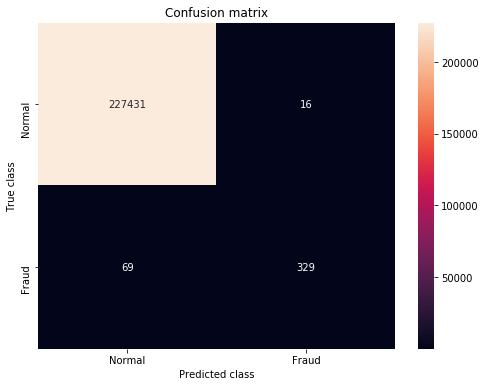

In [76]:
#printing the confusion matrix
LABELS = ['Normal' , 'Fraud']
conf_matrix = confusion_matrix(y_train, predictions_xg_train)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, xticklabels=LABELS,
 yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## Test

In [79]:
predictions_xg_test = xgbcrf.predict(X_test)

In [80]:
print(confusion_matrix(y_test, predictions_xg_test))
print('\n')
print(classification_report(y_test, predictions_xg_test))
print('\n')
print(accuracy_score(y_test, predictions_xg_test))
print(log_loss(y_test, predictions_xg_test))

[[56866     2]
 [   18    76]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.97      0.81      0.88        94

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



0.9996488887328394
0.012126981620960129


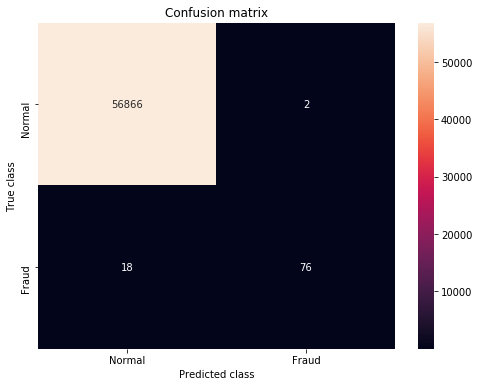

In [81]:
#printing the confusion matrix
LABELS = ['Normal' , 'Fraud']
conf_matrix = confusion_matrix(y_test, predictions_xg_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS,
 yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Scikit-Learn MLP

In [83]:
from sklearn.neural_network import MLPClassifier

In [84]:
mlp = MLPClassifier(max_iter=100, random_state=10)

In [85]:
mlp.fit(X_train, y_train)

/home/intelense/anaconda3/envs/creditcard/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=10, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

# Train data

In [86]:
predictions_mlp_train = mlp.predict(X_train)

In [87]:
print(confusion_matrix(y_train, predictions_mlp_train))
print('\n')
print(classification_report(y_train, predictions_mlp_train))
print('\n')
print(accuracy_score(y_train, predictions_mlp_train))
print(log_loss(y_train, predictions_mlp_train))

[[226760    687]
 [    66    332]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227447
           1       0.33      0.83      0.47       398

    accuracy                           1.00    227845
   macro avg       0.66      0.92      0.73    227845
weighted avg       1.00      1.00      1.00    227845



0.9966951216836007
0.11414886413483954


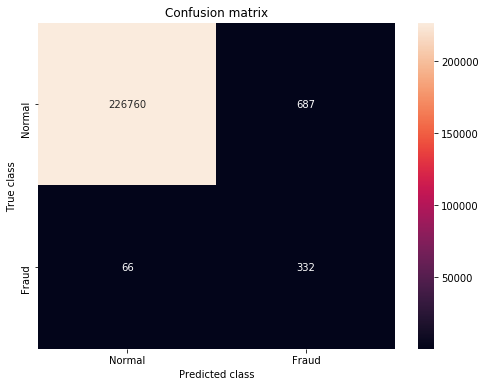

In [88]:
#printing the confusion matrix
LABELS = ['Normal' , 'Fraud']
conf_matrix = confusion_matrix(y_train, predictions_mlp_train)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, xticklabels=LABELS,
 yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## Test data

In [91]:
predictions_mlp_test = mlp.predict(X_test)

In [92]:
print(confusion_matrix(y_test, predictions_mlp_test))
print('\n')
print(classification_report(y_test, predictions_mlp_test))
print('\n')
print(accuracy_score(y_test, predictions_mlp_test))
print(log_loss(y_test, predictions_mlp_test))

[[56703   165]
 [   16    78]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.32      0.83      0.46        94

    accuracy                           1.00     56962
   macro avg       0.66      0.91      0.73     56962
weighted avg       1.00      1.00      1.00     56962



0.9968224430321969
0.10975124576129476


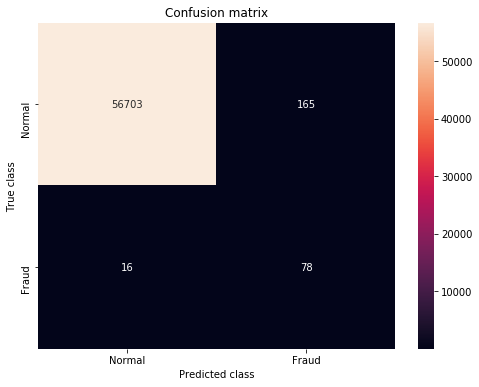

In [93]:
#printing the confusion matrix
LABELS = ['Normal' , 'Fraud']
conf_matrix = confusion_matrix(y_test, predictions_mlp_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS,
 yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### With data normalization MPL converge faster than using unprocessed data